# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Your code here
data = pd.read_csv('data_all.zip')

In [3]:
#data.values[11, 0:]
data[data.e == 21]

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
408,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115936,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116046,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116160,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116184,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


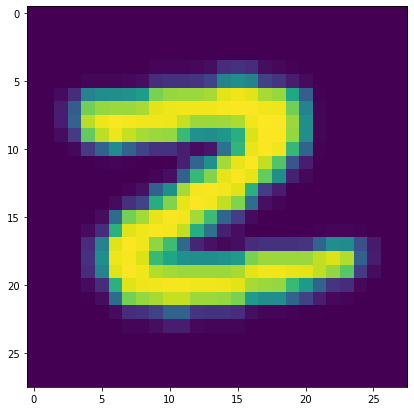

In [4]:
# To Check each element:
plt.figure(figsize=(7, 7))
plt.imshow(data.values[149, 1:].reshape(28, 28))
plt.show();

In [5]:
# 0 - 9 : numbers 0-9           -> Cat: 1
# 10 - 35: capital letters A-Z  -> Cat: 2
# 36 - 61: lower letters a-z    -> Cat: 3

def clasify_data(e_label):
    if (e_label >= 0) and (e_label <= 9):
        return 1
    elif (e_label >= 10) and (e_label <= 35):
        return 2
    elif (e_label >= 36) and (e_label <= 61):
        return 3
        
data['Type'] = data.e.apply(clasify_data)
data['Capital'] = np.where(data.Type == 2,1,0)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [7]:
# Your code here

# Try:
# - Logistic Regression
# - SGD Classifier
# - Linear SVC
# - KNeighbors Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
X = np.array(data.drop(['e','Type','Capital'],axis=1))
y = np.array(data.Capital)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Logistic Regression

logReg_cap = LogisticRegression()
logReg_cap.fit(X_train, y_train)
logReg_cap_pred = logReg_cap.predict(X_test)

print('Model Score: ',logReg_cap.score(X_train, y_train))
print('Regresion Score: ',r2_score(y_test, logReg_cap_pred))

Model Score:  0.7489603146458622
Regresion Score:  -0.24695737942224882


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
# LinearSVC Classification

linSVC_cap = LinearSVC()
linSVC_cap.fit(X_train, y_train)
linSVC_cap_pred = linSVC_cap.predict(X_test)

print('Model Score: ',linSVC_cap.score(X_train, y_train))
print('Regresion Score: ',r2_score(y_test, linSVC_cap_pred))

Model Score:  0.7019998495545741
Regresion Score:  -0.5130776745187182


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
# KNeighborsClassifier Classification

#kNeigh_cap = KNeighborsClassifier(n_neighbors=30000)
#kNeigh_cap.fit(X_train, y_train)
#kNeigh_cap_pred = kNeigh_cap.predict(X_test)

#print('Model Score: ',kNeigh_cap.score(X_train, y_train))
#print('Regresion Score: ',r2_score(y_test, kNeigh_cap_pred))

# TAKES TOO LONG

In [9]:
# SGDClassifier Classification

sgdCls_cap = SGDClassifier(max_iter=1000, tol=1e-3)
sgdCls_cap.fit(X_train, y_train)
sgdCls_cap_pred = sgdCls_cap.predict(X_test)

print('Model Score: ',sgdCls_cap.score(X_train, y_train))
print('Regresion Score: ',r2_score(y_test, sgdCls_cap_pred))

Model Score:  0.6871594828975789
Regresion Score:  -0.5769113267751087


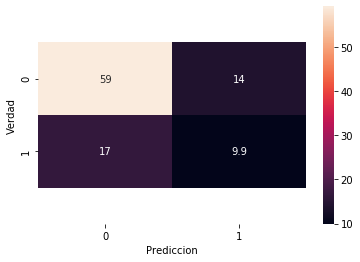

In [15]:
# confusion Matrix for best model:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test, sgdCls_cap_pred)
ax=sns.heatmap((conf/len(sgdCls_cap_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('Prediccion')
plt.ylabel('Verdad')
plt.show();

* Try to do the same thing with lowercases.

In [19]:
# Your code here
data['Lower'] = np.where(data.Type == 3,1,0)
X = data.drop(['e','Type','Capital','Lower'],axis=1)
y = data.Lower

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.2)

In [21]:
# SGDClassifier Classification

sgdCls_cap_l = SGDClassifier(max_iter=1000, tol=1e-3)
sgdCls_cap_l.fit(X_train_l, y_train_l)
sgdCls_cap_l_pred = sgdCls_cap_l.predict(X_test_l)

print('Model Score: ',sgdCls_cap_l.score(X_train_l, y_train_l))
print('Regresion Score: ',r2_score(y_test_l, sgdCls_cap_l_pred))

Model Score:  0.770764155302664
Regresion Score:  -0.27550357504237044


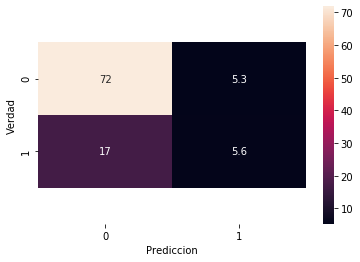

In [22]:
# confusion Matrix for best model:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test_l, sgdCls_cap_l_pred)
ax=sns.heatmap((conf/len(sgdCls_cap_l_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('Prediccion')
plt.ylabel('Verdad')
plt.show();

* Try to do the same thing with numbers.

In [25]:
# Your code here
data['Num'] = np.where(data.Type == 1,1,0)
X = data.drop(['e','Type','Capital','Lower','Num'],axis=1)
y = data.Num

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2)

In [26]:
# SGDClassifier Classification

sgdCls_cap_n = SGDClassifier(max_iter=1000, tol=1e-3)
sgdCls_cap_n.fit(X_train_n, y_train_n)
sgdCls_cap_n_pred = sgdCls_cap_n.predict(X_test_n)

print('Model Score: ',sgdCls_cap_n.score(X_train_n, y_train_n))
print('Regresion Score: ',r2_score(y_test_n, sgdCls_cap_n_pred))

Model Score:  0.6630344842408417
Regresion Score:  -0.3563733380937828


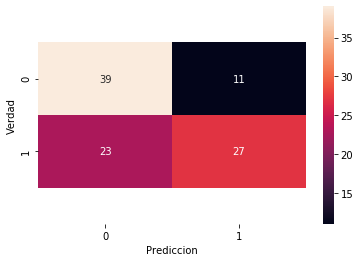

In [27]:
# confusion Matrix for best model:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test_n, sgdCls_cap_n_pred)
ax=sns.heatmap((conf/len(sgdCls_cap_n_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('Prediccion')
plt.ylabel('Verdad')
plt.show();